In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:


def generate_data(nx, qtde, pmax):
    x = np.linspace(-1, 1, nx).reshape(-1, 1)
    y = []
    dy = []
    
    for _ in range(qtde):
        # potencial de grau p aleatório
        p = np.random.randint(2, pmax + 1)

        if np.random.randint(0, 2) == 0:
            coeffs = (np.arange(p) % 2) 
            coeffs[-1] = 1
            coeffs = coeffs * np.random.uniform(0, 2, p)
        else:
            coeffs = ((np.arange(p) + 1) % 2 ) * np.random.uniform(0, 2, p)


        polinomio = np.polyval(coeffs, x)
        noise = 0.01 * np.random.randn(len(x)).reshape(-1, 1)
        y.append(polinomio / np.max(np.abs(polinomio)) + noise)
        
        # derivada
        noise = 0.01 * np.random.randn(len(x)).reshape(-1, 1)
        dy.append(np.polyval(np.polyder(coeffs), x) / np.max(np.abs(polinomio)) + noise)
    
    # empilha dados
    y = np.hstack(y).T
    dy = np.hstack(dy).T
    return y, dy

# gerar dados
y, dy = generate_data(50, 10000, 12)

print(y.shape)
print(dy.shape)

(10000, 50)
(10000, 50)


In [18]:
def pol(x):
    A = np.random.uniform(-1, 1)
    a = np.random.uniform(0, 1)
    b = np.random.uniform(0, 1)
    polimonios = [
                A * (x**2 - a**2)*x,
                A * (x**2 - b**2)*(x**2 - a**2)*x,
                ]
    derivadas = [
                A * ((2*x)*x + (x**2 - a**2)),
                A * ((2*x)*(x**2 - b**2) + (2*x)*(x**2 - a**2)),
                ]
    return polimonios, derivadas

In [19]:
# separa os os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(y, dy, test_size=0.2, random_state=42)

neurons = 10
layers = 10

# define modelo
model = MLPRegressor(
    hidden_layer_sizes=tuple([neurons] * layers), 
    activation='tanh',
    solver='adam',
    max_iter=100000, 
    random_state=42,
    learning_rate='adaptive',
    learning_rate_init = 0.001,
    n_iter_no_change = 50,
    tol = 1e-8,
    verbose=True)

# treinamento
model.fit(X_train, y_train)

# teste
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Iteration 1, loss = 0.71761571
Iteration 2, loss = 0.56755401
Iteration 3, loss = 0.42385949
Iteration 4, loss = 0.32013183
Iteration 5, loss = 0.24974783
Iteration 6, loss = 0.20085634
Iteration 7, loss = 0.16827828
Iteration 8, loss = 0.14432652
Iteration 9, loss = 0.12600043
Iteration 10, loss = 0.11170253
Iteration 11, loss = 0.09858958
Iteration 12, loss = 0.08669653
Iteration 13, loss = 0.07668910
Iteration 14, loss = 0.06793583
Iteration 15, loss = 0.06021655
Iteration 16, loss = 0.05324846
Iteration 17, loss = 0.04708070
Iteration 18, loss = 0.04191535
Iteration 19, loss = 0.03792843
Iteration 20, loss = 0.03435376
Iteration 21, loss = 0.03137214
Iteration 22, loss = 0.02853053
Iteration 23, loss = 0.02641989
Iteration 24, loss = 0.02467965
Iteration 25, loss = 0.02316917
Iteration 26, loss = 0.02176366
Iteration 27, loss = 0.02059905
Iteration 28, loss = 0.01946733
Iteration 29, loss = 0.01844134
Iteration 30, loss = 0.01733979
Iteration 31, loss = 0.01647025
Iteration 32, los

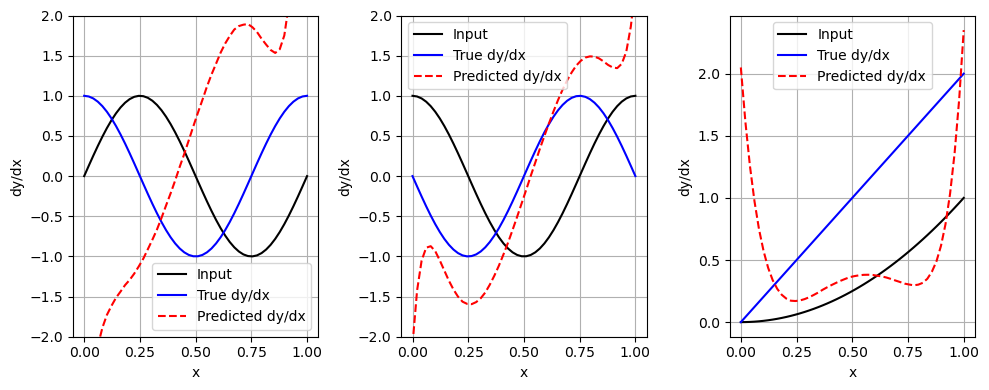

In [20]:
plt.figure(figsize=(10, 4))

new_x = np.linspace(0, 1, y.shape[1]).reshape(1,-1)

# test 1
plt.subplot(131)
new_y = np.sin(2*np.pi*new_x)
new_dy = np.cos(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 2
plt.subplot(132)
new_y = np.cos(2*np.pi*new_x)
new_dy = -np.sin(2*np.pi*new_x)
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.ylim(-2,2)
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

# test 3
plt.subplot(133)
new_y = new_x ** 2
new_dy = 2 * new_x
predicted_derivative = model.predict(new_y)

plt.plot(new_x[0], new_y[0], label='Input', color='black')
plt.plot(new_x[0], new_dy[0], label='True dy/dx', color='blue')
plt.plot(new_x[0], predicted_derivative[0], label='Predicted dy/dx', color='red', linestyle='dashed')
plt.xlabel('x')
plt.ylabel('dy/dx')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()